In [1]:
#importing dataset
bikeshare<- read.csv(file="bikeshare.csv")

In [2]:
head(bikeshare)  #head of bikeshare dataframe

datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
<fct>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1


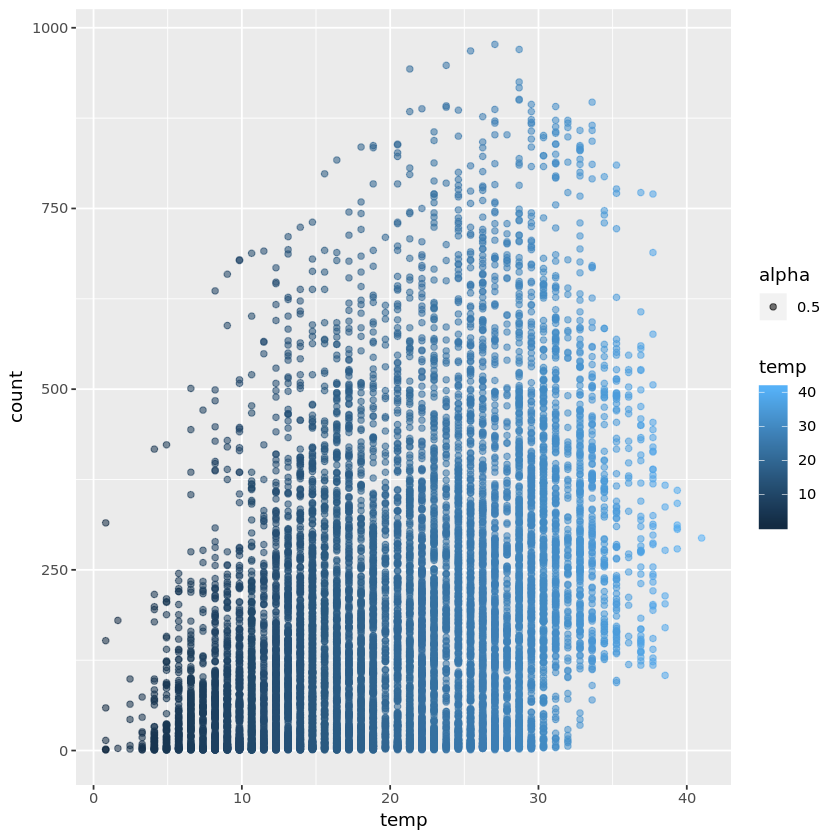

In [5]:
#exxploratory data analysis
#scatterplot of count and temp
library(ggplot2)
counttempplot<- print(ggplot(bikeshare, aes(x=temp,y=count))+geom_point(aes(color=temp,alpha=0.5)))

In [6]:
#convert the datetime column into POSIXct 
bikeshare$datetime <- as.POSIXct(bikeshare$datetime)

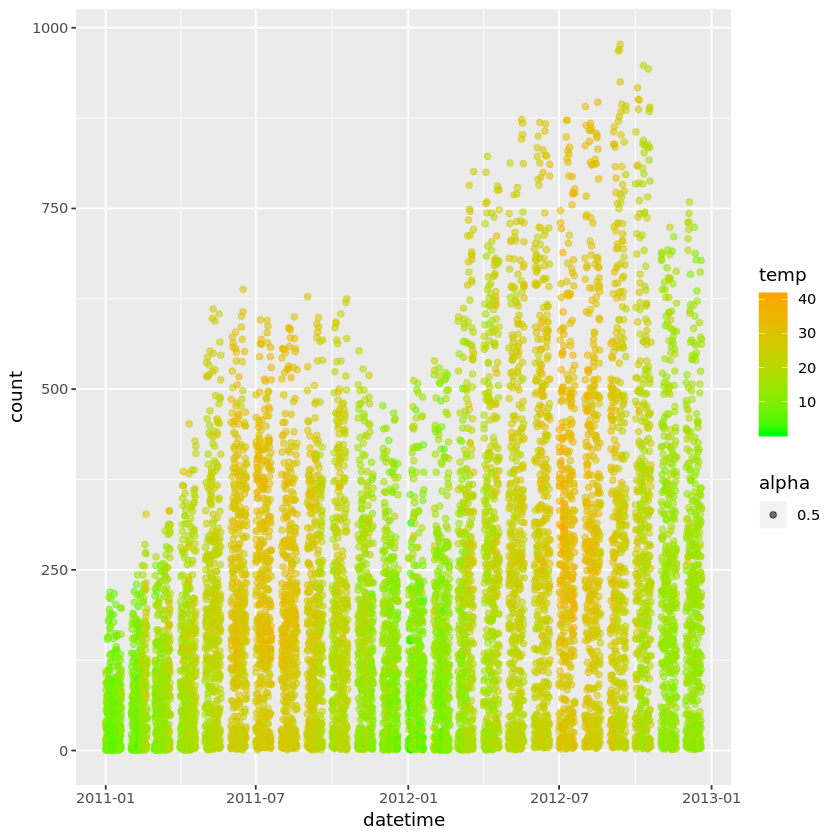

In [7]:
#scatterplot of datetime with a color gradient based on temperature
plot2<- print(ggplot(bikeshare, aes(x=datetime,y=count))+geom_point(aes(color=temp,alpha=0.5))
              + scale_color_continuous(low='green',high='orange'))

In [9]:
#correlation between count and temp
attach(bikeshare)
correlation1<- cor(temp, count)
correlation1

[1] 0.3944536

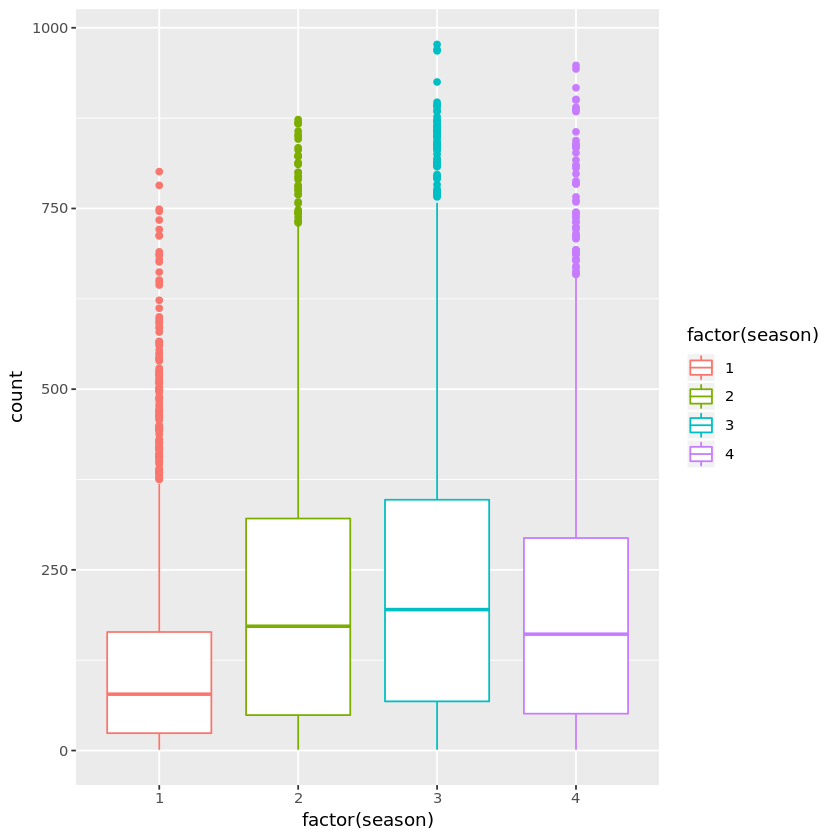

In [10]:
#boxplot of count and season
print(ggplot(bikeshare, aes(x=factor(season),y=count))+geom_boxplot(aes(color=factor(season))))


In [11]:
#creating hour column by extracting hour from datetime column
bikeshare$hour <- sapply(bikeshare$datetime,function(x){format(x,"%H")})
head(bikeshare) # head of the updated dataset

datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
<dttm>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<chr>
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,00
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,01
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,02
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,03
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,04
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,05


In [12]:
#scatterplot of count versus hour, with color scale based on temp and where workingday is 1
library(dplyr)
bikeshare<-as.data.frame(bikeshare)
bikenew<- bikeshare[workingday==1,]
head(bikenew)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
,<dttm>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<chr>
48,2011-01-03 00:00:00,1,0,1,1,9.02,9.850,44,23.9994,0,5,5,00
49,2011-01-03 01:00:00,1,0,1,1,8.20,8.335,44,27.9993,0,2,2,01
50,2011-01-03 04:00:00,1,0,1,1,6.56,6.820,47,26.0027,0,1,1,04
51,2011-01-03 05:00:00,1,0,1,1,6.56,6.820,47,19.0012,0,3,3,05
52,2011-01-03 06:00:00,1,0,1,1,5.74,5.305,50,26.0027,0,30,30,06
53,2011-01-03 07:00:00,1,0,1,1,5.74,6.820,50,12.9980,1,63,64,07


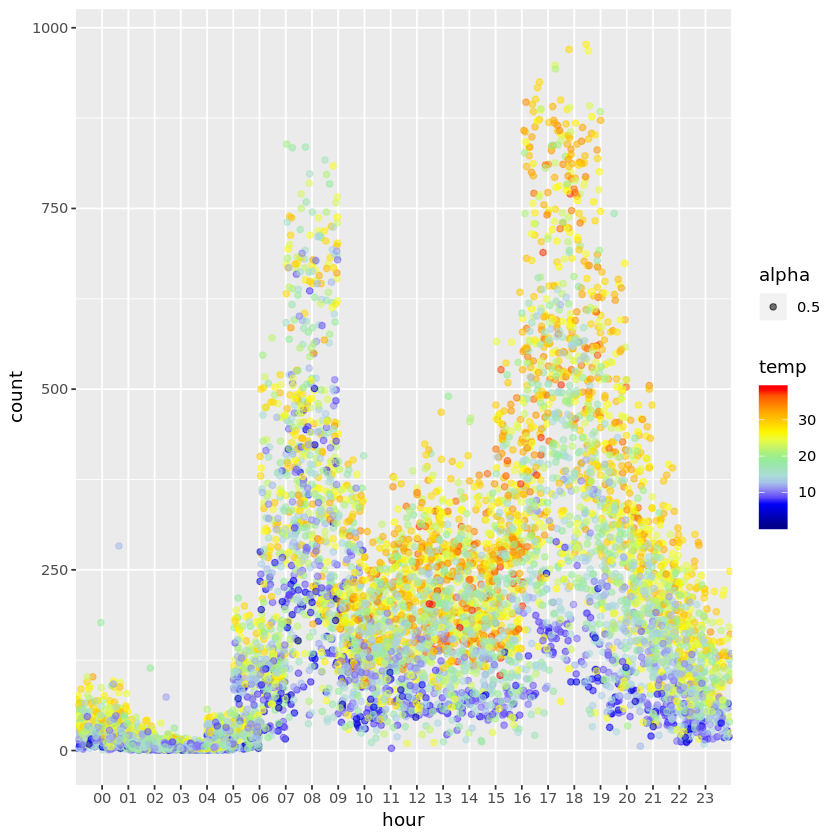

In [13]:
plot4<- print(ggplot(bikenew, aes(x=hour,y=count))+
      geom_point(position=position_jitter(w=1, h=0),aes(color=temp,alpha=0.5))+
    scale_color_gradientn(colours = c('dark blue','blue','light blue','light green','yellow','orange','red')) )

In [14]:
#scatterplot of count versus hour, with color scale based on temp and where workingday is 0
bikeshare<-as.data.frame(bikeshare)
bikenew2<- bikeshare[workingday==0,]
head(bikenew2)

datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
<dttm>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<chr>
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,00
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,01
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,02
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,03
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,04
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,05


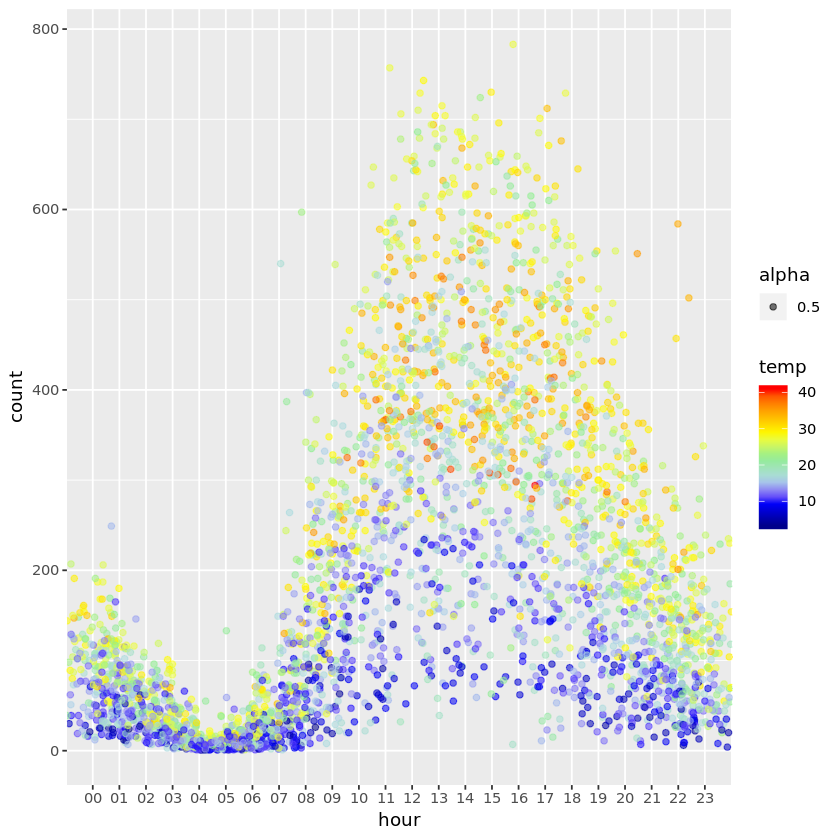

In [15]:
plot5<- print(ggplot(bikenew2, aes(x=hour,y=count))+
                geom_point(position=position_jitter(w=1, h=0),aes(color=temp,alpha=0.5))+
                scale_color_gradientn(colours = c('dark blue','blue','light blue','light green','yellow','orange','red')) )


In [20]:
# change the hour column to a numeric column
bikeshare$hour <- sapply(bikeshare$hour,as.numeric)

In [22]:
#splitting data into test and train
library(caTools)
split_data<- sample.split(bikeshare$count, SplitRatio = 0.7)
train_data= subset(bikeshare, split_data==TRUE) # train dataset
test_data= subset(bikeshare, split_data==FALSE) #test dataset

In [23]:
#building linear model
model<- lm(count~season+holiday+workingday+weather+temp+humidity+windspeed+hour, data = train_data)
summary(model)


Call:
lm(formula = count ~ season + holiday + workingday + weather + 
    temp + humidity + windspeed + hour, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-327.68  -97.12  -31.75   56.41  689.40 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  49.8901    10.1792   4.901 9.72e-07 ***
season       20.9811     1.6343  12.838  < 2e-16 ***
holiday     -11.2982    10.4868  -1.077    0.281    
workingday    0.4603     3.7884   0.121    0.903    
weather      -4.3386     2.9964  -1.448    0.148    
temp          7.1485     0.2295  31.152  < 2e-16 ***
humidity     -2.2573     0.1097 -20.579  < 2e-16 ***
windspeed     0.2466     0.2238   1.102    0.271    
hour          7.5934     0.2611  29.079  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 149.2 on 7628 degrees of freedom
Multiple R-squared:  0.3364,	Adjusted R-squared:  0.3357 
F-statistic: 483.4 on 8 and 7628 DF,  p-value: 

In [24]:
# predict count
countPred <- predict(model,test_data)

In [25]:
 # creating actuals_predicteds dataframe
actuals_preds <- data.frame(cbind(actuals=test_data$count, predicteds=countPred)) 

In [28]:
#accuracy of the model
correlation_accuracy <- cor(actuals_preds)
correlation_accuracy

,actuals,predicteds
actuals,1.0000000,0.5735614
predicteds,0.5735614,1.0000000


In [26]:
#head of the dataframe
head(actuals_preds)

,actuals,predicteds
,<dbl>,<dbl>
2,40,-41.979252
3,32,-34.385889
6,1,2.684113
8,3,-15.824655
15,106,145.480414
20,37,130.774322


In [32]:
#min_max accuracy
min_max_accuracy <- mean(apply(actuals_preds, 1, min) / apply(actuals_preds, 1, max)) 
min_max_accuracy

[1] 0.3420249

In [33]:
#mean absolute percentage deviation
mape <- mean(abs((actuals_preds$predicteds - actuals_preds$actuals))/actuals_preds$actuals) 
mape

[1] 3.232901